# Code for Top and Bottom Coding Protection Methods

***

Borrowing the notation from [Schneider & Lee (2022)](https://arxiv.org/abs/2106.16085):

There are $J$ times series denoted $y_j$.

The confidential (actual) value of $y_j$ at time $t$ is denoted $A_{j,t}$.

Under `Top Coding`, the top $p$ percent of observations are replaced with the $1-p$ quantile. Under `Bottom Coding`, the bottom $p$ percent of observations are replaced with the $p$ quantile.

***

In [1]:
# general modules
import numpy as np
import pandas as pd

# nice time series plots
from sktime.utils.plotting import plot_series

In [2]:
# import weekly finance series, skipping column names
Y = np.genfromtxt("../../../Data/Train/Clean/weekly_finance_clean.csv", delimiter = ',', skip_header = 1)

In [3]:
def coding_protection(sensitive_series, coding_type, percent_protected):
    """
    Performs top or bottom coding on a sensitive time series, returns the protected series.

    :param sensitive_series: confidential time series
    :param coding_type: whether to perform "Top" or "Bottom" coding
    :param percent_protected: the percentage of top or bottom observations to protect
    :return: protected series
    """
    if coding_type=="Bottom":
        q = np.quantile(sensitive_series, q=percent_protected)
        series_bc = np.array([i if i > q else q for i in sensitive_series])
    elif coding_type=="Top":
        q = np.quantile(sensitive_series, q=1-percent_protected)
        series_bc = np.array([i if i < q else q for i in sensitive_series])
    return series_bc

In [4]:
Y_tc = np.apply_along_axis(func1d=coding_protection, axis=1, arr=Y, coding_type="Top", percent_protected=0.10)

In [5]:
Y_bc = np.apply_along_axis(func1d=coding_protection, axis=1, arr=Y, coding_type="Bottom", percent_protected=0.10)

In [6]:
Y_tc, Y_bc, Y = pd.DataFrame(Y_tc), pd.DataFrame(Y_bc), pd.DataFrame(Y)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='0'>)

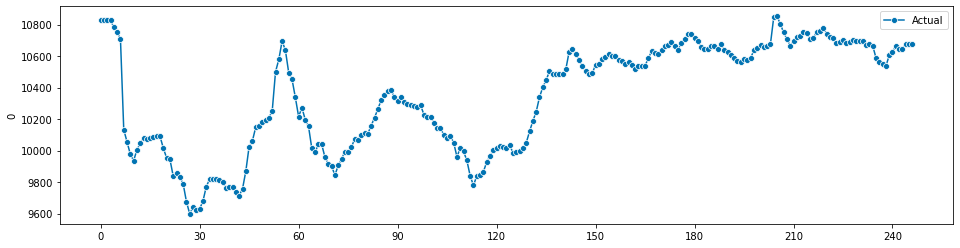

In [10]:
plot_series(Y.iloc[0,:], labels=["Actual"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='0'>)

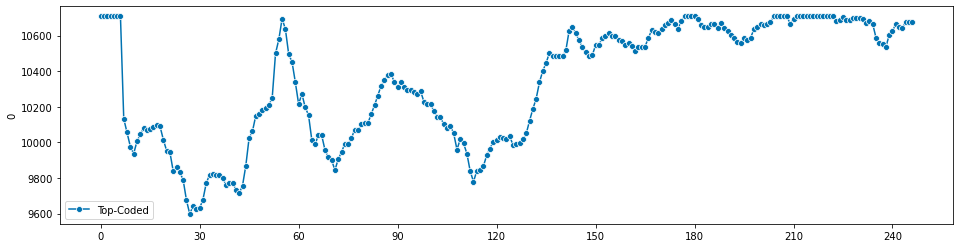

In [11]:
plot_series(Y_tc.iloc[0,:], labels=["Top-Coded"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='0'>)

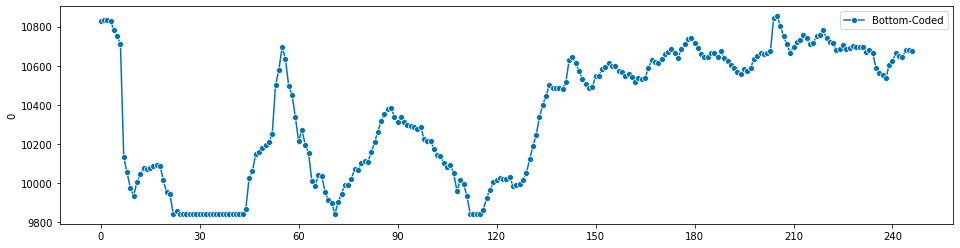

In [12]:
plot_series(Y_bc.iloc[0,:], labels=["Bottom-Coded"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='0'>)

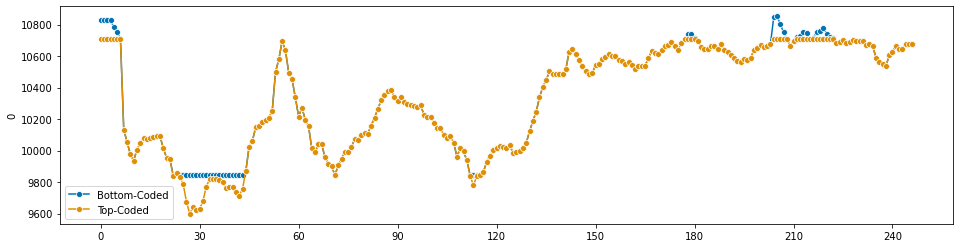

In [13]:
plot_series(Y_bc.iloc[0,:], Y_tc.iloc[0,:], labels=["Bottom-Coded", "Top-Coded"])